# K-nearest Neighbour (KNN)
KNN is a `supervised machine learning` algorithm that can be used to solve both `classification` and `regression` problems.

It is a non-parametric, lazy learning algorithm. Non-parametric means that it does not make any assumptions on the underlying data distribution. Lazy learning means that it does not require any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier.

KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

In [1]:
# Example of KNN classifier on IRIS data using sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Split the data into X and Y
X = df.drop('species', axis=1)
y = df['species']

In [7]:
# load and fit the KNN classifier in the data
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the data
knn.fit(X, Y)

# Predict the species for a new set of measurements
new_measurements = [[5.1, 3.5, 1.4, 0.2]]
predicted_species = knn.predict(new_measurements)
print(predicted_species)

['setosa']


C:\Users\Kaleem KM\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'True')

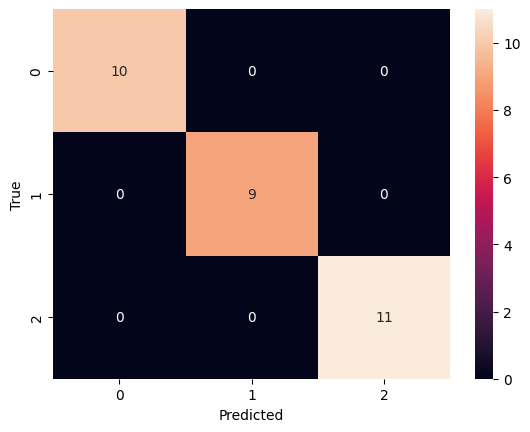

In [9]:
# train test split the data
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
# fit the model on the training data
model.fit(X_train, y_train)

# Predict the species for the test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')


# Regression using KNN

In [10]:
# Regression problem on the tips dataset

# load the dataset
tips = sns.load_dataset('tips')
tips.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
# split the data into X and Y
X = tips.drop('tip', axis=1)
y = tips['tip']

In [13]:
# encode the categorical columns using for lopp and le
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])

In [14]:
# train test split the data and train the model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsRegressor(n_neighbors=5, metric= 'minkowski', p=2)
# train the model
model.fit(X_train, y_train)

# predict the tips
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 0.8382265306122448
R2 Score: 0.3294034029001649
RMSE: 0.9155471209130881


In [15]:
# Predict the specific value
model.predict([[15,1,1,1,1,5]])

C:\Users\Kaleem KM\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([2.79])